In [2]:
import pandas as pd

In [12]:
# Read data
df = pd.read_csv("sample-orders.csv", encoding='ISO-8859-1', parse_dates=['order_date'])
df.head()

,order_date,order_id,customer,grand_total
0,2011-09-07,CA-2011-100006,Dennis Kane,378
1,2011-07-08,CA-2011-100090,Ed Braxton,699
2,2011-03-14,CA-2011-100293,Neil Franzsisch,91
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4
4,2011-04-08,CA-2011-100363,Jim Mitchum,21


In [13]:
df.dtypes

order_date     datetime64[ns]
order_id               object
customer               object
grand_total             int64
dtype: object

In [43]:
# some basic statistics of the data set
print(f"Total # transactions: {df.shape[0]}")
print(f"# Unique customers: {df['customer'].nunique()}")
print(f"Total transaction amount: ${df['grand_total'].sum()}")
print(f"Period covers: {min(df.order_date)} to {max(df.order_date)}")


Total # transactions: 5009
# Unique customers: 793
Total transaction amount: $2297261
Period covers: 2011-01-04 00:00:00 to 2014-12-31 00:00:00


In [47]:
df.describe(include='all')

,order_date,order_id,customer,grand_total
count,5009,5009,5009,5009.000000
unique,1238,5009,793,NaN
top,2013-09-06 00:00:00,US-2011-159611,Emily Phan,NaN
freq,19,1,17,NaN
first,2011-01-04 00:00:00,NaN,NaN,NaN
last,2014-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,458.626672
std,NaN,NaN,NaN,954.729307
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,38.000000


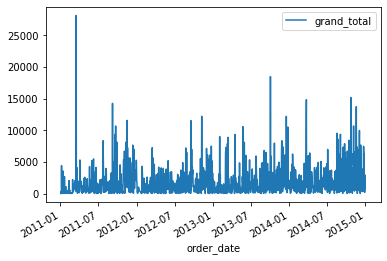

In [38]:
# basic plots

# transactions over time
import matplotlib.pyplot as plt
df_trx = df.groupby('order_date').agg({'grand_total':sum})
df_trx.plot()

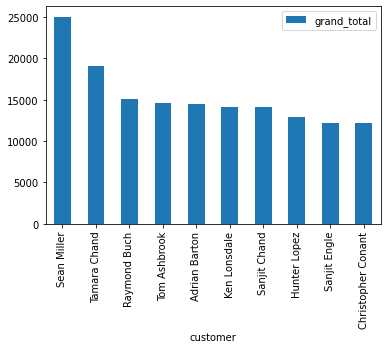

In [57]:
# Top 10 customers by value
df.groupby('customer').agg({'grand_total': sum}).nlargest(10, columns='grand_total').plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efee8f16940>]],
      dtype=object)

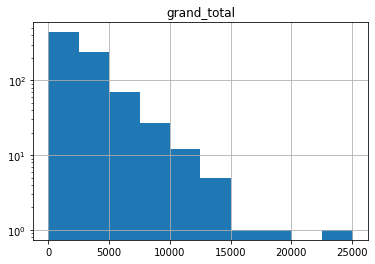

In [60]:
# Histogram of customer's order value
df.groupby('customer').agg({'grand_total': sum}).hist(bins=10, log=True)

In [79]:
# Compute R, F and M
# for each dimension, we divide customers into 4 quartiles
from datetime import timedelta
TODAY = max(df['order_date']) + timedelta(days=1)

df_customers = df.groupby('customer').agg(
    #min_order_date = ('order_date', min),
    #max_order_date = ('order_date', max),
    R = ("order_date", lambda x: (TODAY - max(x)).days),
    F = ("order_id", 'count'),
    M = ('grand_total', sum),
)
df_customers.head()

,R,F,M
customer,,,
Aaron Bergman,416,3,887
Aaron Hawkins,13,7,1744
Aaron Smayling,89,7,3050
Adam Bellavance,55,8,7756
Adam Hart,35,10,3249


In [80]:
df_customers.describe()

,R,F,M
count,793.000000,793.000000,793.000000
mean,147.805801,6.316520,2896.924338
std,186.231107,2.550885,2628.660490
min,1.000000,1.000000,5.000000
25%,31.000000,5.000000,1145.000000
50%,76.000000,6.000000,2257.000000
75%,184.000000,8.000000,3784.000000
max,1167.000000,17.000000,25042.000000


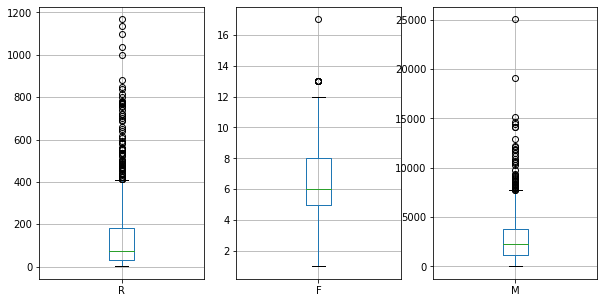

In [82]:
# Plotting time
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df_customers.boxplot('R',ax=ax[0])
df_customers.boxplot('F',ax=ax[1])
df_customers.boxplot('M',ax=ax[2])